In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv("./Data/alzheimer.csv")
df.head()
df.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [3]:
#removing the converted class
df = df[df['Group'] != "Converted"]
df.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,336.000000,336.000000,317.000000,334.000000,336.000000,336.000000,336.000000,336.000000
mean,76.711310,14.502976,2.545741,27.194611,0.294643,1491.306548,0.730211,1.193595
std,7.614793,2.900333,1.123099,3.819639,0.385678,179.940267,0.037313,0.140914
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,26.000000,0.000000,1357.000000,0.700750,1.097500
50%,76.000000,14.000000,2.000000,29.000000,0.000000,1475.000000,0.731000,1.190000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1599.750000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [4]:
df['Group'].value_counts()

Group
Nondemented    190
Demented       146
Name: count, dtype: int64

In [5]:
df['M/F'].value_counts()

M/F
F    189
M    147
Name: count, dtype: int64

In [6]:
# Mapping gender as numeric values for training the model
df["M/F"] = df["M/F"].map({"M": 0, "F": 1})
# df['M/F'].value_counts()
# df["Group"] = df["Group"].map({"Nondemented": 0, "Demented": 1})
# df.Group.value_counts()

In [7]:
df = df.dropna()
# df.head()
# df.Group.value_counts()
df.describe()

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,0.567823,76.716088,14.615142,2.545741,27.261830,0.272871,1493.577287,0.730596,1.191606
std,0.496162,7.805071,2.926876,1.123099,3.861227,0.382144,179.719079,0.038102,0.139663
min,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.000000,0.700000,1.098000
50%,1.000000,76.000000,15.000000,2.000000,29.000000,0.000000,1476.000000,0.732000,1.189000
75%,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1599.000000,0.757000,1.293000
max,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


test1: the original table with all 9 features used for the model.

In [8]:
target_test1 = df["Group"]

Features

In [9]:
df.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [10]:
# features used for prediction
features = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE','CDR', 'eTIV', 'nWBV','ASF']

training_test1 = df[features]

Creating a model

In [11]:
CDRmodel = DecisionTreeClassifier(criterion="gini",random_state=42)
# CDRmodel.fit(training_test1,target_test1)

In [12]:
scores_CDR = cross_val_score(CDRmodel,training_test1,target_test1,cv=4)

In [13]:
print(f"Cross validation scores with 4 fold CV when we train with CDR {scores_CDR}")
print(f"Average score of model was {scores_CDR.mean()*100}%")
# plot_tree(CDRmodel,feature_names=features, class_names=)


Cross validation scores with 4 fold CV when we train with CDR [0.975      1.         1.         0.98734177]
Average score of model was 99.05854430379748%


In [14]:
# building model without CDR
featuresWOCDR = ["Group",'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV','ASF']
df_without_CDR = df[featuresWOCDR]
target_test2 = df['Group']
features = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV','ASF']
training_test2 = df_without_CDR[features]
# df_without_CDR.describe()
# df_without_CDR.head()
training_test2.head()

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,0,87,14,2.0,27.0,1987,0.696,0.883
1,0,88,14,2.0,30.0,2004,0.681,0.876
5,1,88,18,3.0,28.0,1215,0.710,1.444
6,1,90,18,3.0,27.0,1200,0.718,1.462
7,0,80,12,4.0,28.0,1689,0.712,1.039


In [15]:
nonCDRmodel = DecisionTreeClassifier(criterion="gini",random_state=42)
# nonCDRmodel.fit(training_test2,target_test2)
scores_nonCDR = cross_val_score(nonCDRmodel,training_test2,target_test2,cv=4)
print(f"Cross validation scores 4 folds, we train with CDR {scores_nonCDR}")
print(f"Average score of model was {scores_nonCDR.mean()*100}%")

Cross validation scores 4 folds, we train with CDR [0.825      0.7721519  0.7721519  0.81012658]
Average score of model was 79.48575949367088%


In [16]:
# using mutual info classfier we found out that CDR, MMSE, EDUC, nWBV, eTIV and ASF are good features 
bestFeatures = ["Group", 'EDUC', 'MMSE', 'eTIV', 'nWBV','ASF']
df_best_features = df
target_test3 = df_best_features["Group"]
training_test3 = df_best_features[['EDUC', 'MMSE', 'eTIV', 'nWBV','ASF']]
bestFeaturesModel = DecisionTreeClassifier(criterion="gini",random_state=42)
scores_bestFeatures = cross_val_score(nonCDRmodel,training_test3,target_test3,cv=4)
print(f"Cross validation scores for the 10 scores is when we train with CDR {scores_bestFeatures}")
print(f"Average score of model was {scores_bestFeatures.mean()*100}%")

Cross validation scores for the 10 scores is when we train with CDR [0.7        0.74683544 0.82278481 0.79746835]
Average score of model was 76.67721518987342%


## Result
when we train with CDR the cross_val_score = 98.73%  
when we train without CDR the cross_val_score = 77.30%



Everything Above was rough work!!  
---
---  
## Decision Trees

In [17]:
# import dependencies
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

# cross validation scor
from sklearn.model_selection import cross_val_score

# confusion matrix
from sklearn.metrics import confusion_matrix

# train test split
from sklearn.model_selection import train_test_split

# RFE for feature selection
from sklearn.feature_selection import RFE

import matplotlib.pyplot as plt

In [18]:
# reading and cleaning the file for building DT model
alzheimerFile = "Data/alzheimer.csv"
df = pd.read_csv(alzheimerFile)
# df.head()
df.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [19]:
#removing the converted class
df = df.dropna()
df = df[df['Group'] != "Converted"]
df["M/F"] = df["M/F"].map({"M": 0, "F": 1})
df.describe()

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,0.567823,76.716088,14.615142,2.545741,27.261830,0.272871,1493.577287,0.730596,1.191606
std,0.496162,7.805071,2.926876,1.123099,3.861227,0.382144,179.719079,0.038102,0.139663
min,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.000000,0.700000,1.098000
50%,1.000000,76.000000,15.000000,2.000000,29.000000,0.000000,1476.000000,0.732000,1.189000
75%,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1599.000000,0.757000,1.293000
max,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [20]:
df.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

### Decision Tree 1
Standard Decision Tree using random_state 3  

This is a DT with all the features ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'] used for classifying 'Group'

In [21]:
# features
features = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
X = df[features]
y = df['Group']

#### Evaluation using Confusion matrix

The cm is: 
[[32  0]
 [ 1 47]]
Accuracy is 98.75%


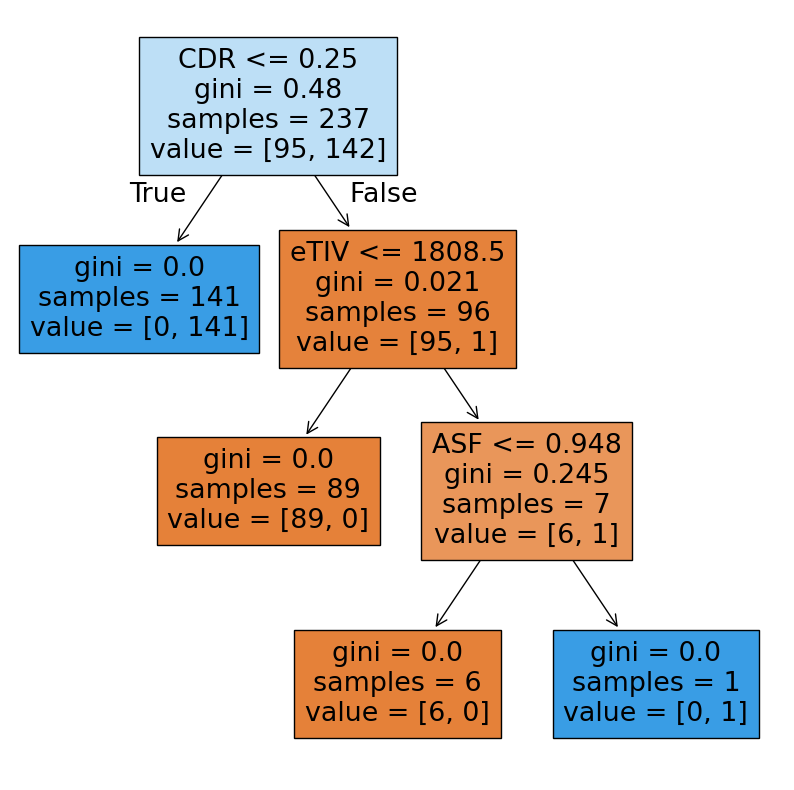

In [22]:
model = DecisionTreeClassifier(random_state=3)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 3)

model.fit(train_X,train_y)

predicted_y = model.predict(val_X)

cm = confusion_matrix(val_y,predicted_y)
print(f"The cm is: \n{cm}")
accuracy = ((cm[0,0] + cm[1,1])/cm.sum())
print(f"Accuracy is {accuracy*100}%")

plt.figure(figsize=(10,10))
plot_tree(model, feature_names=features, filled=True)
plt.show()

using CDR, the tree is very simple and of low depth

#### Evaluation using 4 - fold Cross validation

In [23]:
# evaluation using confusion matrix
model = DecisionTreeClassifier(random_state=3)
scores_4FCVR = cross_val_score(model,X,y,cv=4)
print(f"The 4 fold CVR score is for the standard DT with all features is: {round(scores_4FCVR.mean()*100,2)}")

# plt.figure(figsize=(10,10))

# plot_tree(model, feature_names=features, filled=True)
# plt.show()

The 4 fold CVR score is for the standard DT with all features is: 99.06


### Decision Tree 2: fitting without 'CDR' feature
Since CDR is a feature that is a strong indicator for dementia, we will try fitting the data without it

In [24]:
# features without CDR
features_NoCDR = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
X_NoCDR = df[features_NoCDR]
y= df['Group']

#### Using accuracy by using a confusion matrix

In [25]:

model = DecisionTreeClassifier(random_state=3)

train_X, val_X, train_y, val_y = train_test_split(X_NoCDR, y, random_state = 3)

model.fit(train_X,train_y)

predicted_y = model.predict(val_X)

cm = confusion_matrix(val_y,predicted_y)
print(f"The cm is: \n{cm}")
accuracy = ((cm[0,0] + cm[1,1])/cm.sum())
print(f"Accuracy when we fit data without CDR is: {accuracy*100}%")

The cm is: 
[[22 10]
 [ 7 41]]
Accuracy when we fit data without CDR is: 78.75%


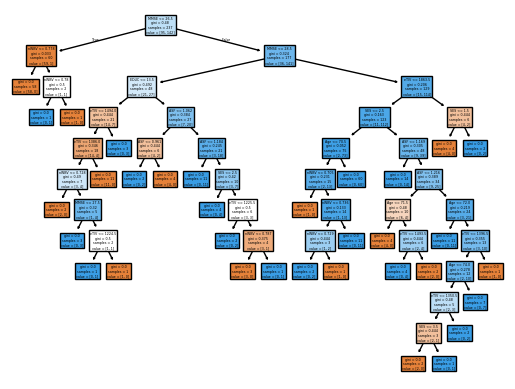

In [26]:
plot_tree(model, feature_names=features_NoCDR, filled=True)
plt.show()

#### Attempting to get an optimal max_leaf_nodes 
By tweaking how the model can be made, we can try achieving a better accuracy.

In [27]:
def get_accuracy(train_X, val_X, train_y, val_y, max_LN):
    model = DecisionTreeClassifier(max_leaf_nodes=max_LN, random_state=3)
    model.fit(train_X,train_y)
    predicted_y = model.predict(val_X)
    cm = confusion_matrix(val_y,predicted_y)
    accuracy = ((cm[0,0] + cm[1,1])/cm.sum())
    return(accuracy)
    

In [28]:
for maxVal in [4,5,7,10,13,15,18,20,22,25,27,30]:
    acc = get_accuracy(train_X, val_X, train_y, val_y, maxVal)
    print(f"Max leaf nodes: {maxVal}  \t\t accuracy:  {acc*100}%")

Max leaf nodes: 4  		 accuracy:  81.25%
Max leaf nodes: 5  		 accuracy:  81.25%
Max leaf nodes: 7  		 accuracy:  82.5%
Max leaf nodes: 10  		 accuracy:  82.5%
Max leaf nodes: 13  		 accuracy:  83.75%
Max leaf nodes: 15  		 accuracy:  85.0%
Max leaf nodes: 18  		 accuracy:  83.75%
Max leaf nodes: 20  		 accuracy:  83.75%
Max leaf nodes: 22  		 accuracy:  83.75%
Max leaf nodes: 25  		 accuracy:  82.5%
Max leaf nodes: 27  		 accuracy:  81.25%
Max leaf nodes: 30  		 accuracy:  81.25%


based on above results, when max leaf nodes is set to 15, we get an accuracy of upto 85%

when max leaf nodes is 15 the accuracy without using CDR is: 85.0%


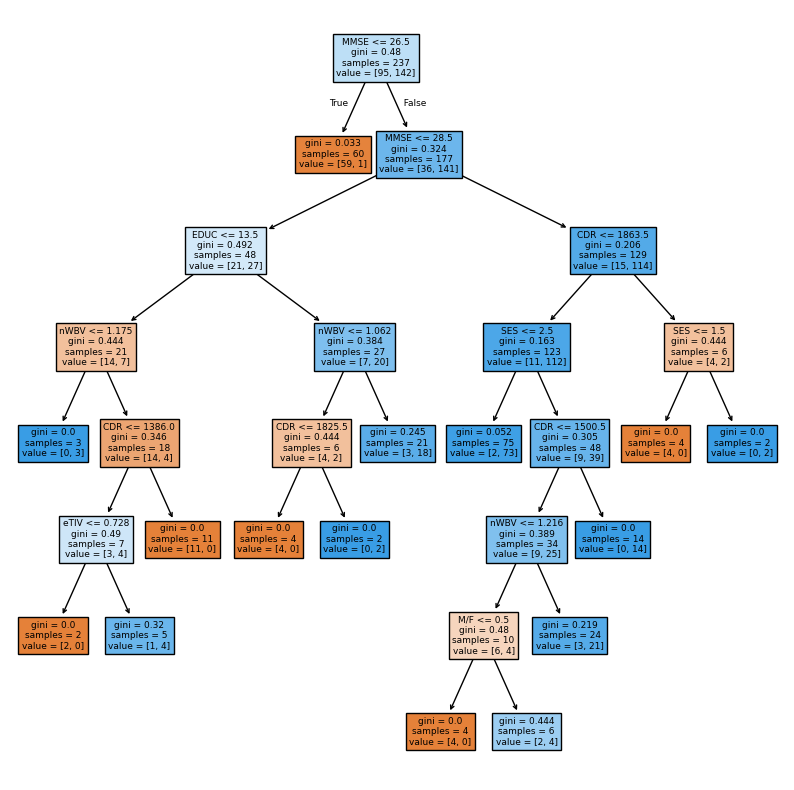

In [29]:
model = DecisionTreeClassifier(max_leaf_nodes=15, random_state=3)
model.fit(train_X,train_y)
predicted_y = model.predict(val_X)
cm = confusion_matrix(val_y,predicted_y)
accuracy = ((cm[0,0] + cm[1,1])/cm.sum())

print(f"when max leaf nodes is 15 the accuracy without using CDR is: {accuracy*100}%")

plt.figure(figsize=(10,10))
plot_tree(model, feature_names=features, filled=True)
plt.show()


#### Similarly for calculating using 4 fold CVR

In [30]:
def get_4FCVR(X,y, max_LN):
    model = DecisionTreeClassifier(max_leaf_nodes=max_LN, random_state=3)
    score = cross_val_score(model,X,y,cv=4)
    return(score)

In [31]:
for maxVal in [4,5,7,10,13,15,18,20,22,25,27,30]:
    scores = get_4FCVR(X_NoCDR,y,maxVal)
    print(f"Max leaf nodes: {maxVal}  \t\t 4-fold CVR:  {round(scores.mean()*100,2)}%")

Max leaf nodes: 4  		 4-fold CVR:  83.27%
Max leaf nodes: 5  		 4-fold CVR:  83.58%
Max leaf nodes: 7  		 4-fold CVR:  82.31%
Max leaf nodes: 10  		 4-fold CVR:  82.63%
Max leaf nodes: 13  		 4-fold CVR:  82.01%
Max leaf nodes: 15  		 4-fold CVR:  82.63%
Max leaf nodes: 18  		 4-fold CVR:  79.47%
Max leaf nodes: 20  		 4-fold CVR:  80.1%
Max leaf nodes: 22  		 4-fold CVR:  79.79%
Max leaf nodes: 25  		 4-fold CVR:  79.79%
Max leaf nodes: 27  		 4-fold CVR:  79.79%
Max leaf nodes: 30  		 4-fold CVR:  78.86%


we get a good score with having 10 or 15 max_leaf_nodes

---
## Random Forest 
This is just to compare with DT

In [32]:
from sklearn.ensemble import RandomForestClassifier
# features without CDR
features_NoCDR = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
X_NoCDR = df[features_NoCDR]
y= df['Group']
model = RandomForestClassifier(random_state=3)

score = cross_val_score(model,X_NoCDR,y,cv=4)
print(f"The 4 fold cvr score is {round(score.mean()*100,2)}% ")


The 4 fold cvr score is 82.63% 


with very little tuning, Random forest classifier gets a 4-fold CVR of 82.63%

In [33]:
model = RandomForestClassifier(max_leaf_nodes=15, random_state=3)

train_X, val_X, train_y, val_y = train_test_split(X_NoCDR, y, random_state = 3)

model.fit(train_X,train_y)
predicted_y = model.predict(val_X)
cm = confusion_matrix(val_y,predicted_y)
accuracy = ((cm[0,0] + cm[1,1])/cm.sum())

print(f"Using random forests without using CDR accuracy is: {accuracy*100}%")

Using random forests without using CDR accuracy is: 83.75%


In [34]:
importance = model.feature_importances_
for i in range(len(features_NoCDR)):
    print(f'Feature: {features_NoCDR[i]} \t rating: {round(importance[i]*100,2)}%')


Feature: M/F 	 rating: 4.2%
Feature: Age 	 rating: 7.42%
Feature: EDUC 	 rating: 6.52%
Feature: SES 	 rating: 4.29%
Feature: MMSE 	 rating: 43.36%
Feature: eTIV 	 rating: 9.48%
Feature: nWBV 	 rating: 15.19%
Feature: ASF 	 rating: 9.53%


### Decision Tree 3: using the best features from RandomForsts for classification
without using the CDR feature, try picking the best 4 best features for classification


In [35]:
# best features with CDR
features_best4 = ['CDR','MMSE', 'eTIV', 'nWBV', 'ASF']
X_best4 = df[features_best4]
y= df['Group']

model = DecisionTreeClassifier(random_state=3)

train_X, val_X, train_y, val_y = train_test_split(X_best4, y, random_state = 3)

model.fit(train_X,train_y)

predicted_y = model.predict(val_X)

cm = confusion_matrix(val_y,predicted_y)
print(f"The cm is: \n{cm}")
accuracy = ((cm[0,0] + cm[1,1])/cm.sum())
print(f"Accuracy when we fit data with the best features is: {accuracy*100}%")


The cm is: 
[[32  0]
 [ 1 47]]
Accuracy when we fit data with the best features is: 98.75%


In [36]:
for maxVal in [4,5,7,10,13,15,18,20,22,25,27,30]:
    acc = get_accuracy(train_X, val_X, train_y, val_y, maxVal)
    print(f"Max leaf nodes: {maxVal}  \t\t accuracy:  {acc*100}%")

Max leaf nodes: 4  		 accuracy:  98.75%
Max leaf nodes: 5  		 accuracy:  98.75%
Max leaf nodes: 7  		 accuracy:  98.75%
Max leaf nodes: 10  		 accuracy:  98.75%
Max leaf nodes: 13  		 accuracy:  98.75%
Max leaf nodes: 15  		 accuracy:  98.75%
Max leaf nodes: 18  		 accuracy:  98.75%
Max leaf nodes: 20  		 accuracy:  98.75%
Max leaf nodes: 22  		 accuracy:  98.75%
Max leaf nodes: 25  		 accuracy:  98.75%
Max leaf nodes: 27  		 accuracy:  98.75%
Max leaf nodes: 30  		 accuracy:  98.75%
